<h2 style="color: #97042a;">Libraries</h2>

In [1]:
import pandas as pd 
import numpy as np
import warnings

# vizz
# import pygwalker as pyg
import seaborn as sns
import matplotlib.pyplot as plt

# Stats
import scipy.stats as st
import pingouin as pg # ANOVA test
from pingouin import welch_anova # Welch's ANOVA
from scipy.stats import chi2_contingency # Chi-square test
from scipy.stats.contingency import association # Cramér's V

# Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
# Data load
data_country = pd.read_csv('country_df.csv')
data_region = pd.read_csv('region_df.csv')

In [3]:
# Copy
df_c = data_country.copy()
df_r = data_region.copy()

<h2 style="color: #97042a;">Functions</h2>

In [6]:
def categorize_column(df, column_name):
    # Define the range for bins
    bins = [0, 10, 20, 30, 50, float('inf')]
    
    # Label each bin
    labels = ["Very Low (0-10%)", "Low (10-20%)", "Medium (20-30%)", "High (30-40%)", "Very High (40%+)"]

    # Create a new column with the bin labels
    new_column_name = f'{column_name}_rating'
    df[new_column_name] = pd.cut(
        df[column_name], 
        bins=bins, 
        labels=labels, 
        include_lowest=True
    )
    return df

In [7]:
def categorize_column1(df, column_name):
    # Define the range for bins
    bins = [0, 20, 40, 60, 80, float('inf')]
    
    # Label each bin
    labels = ["Very Low (0-20)", "Low (20-40)", "Medium (40-60)", "High (60-80)", "Very High (80+)"]

    # Create a new column with the bin labels
    new_column_name = f'{column_name}_rating'
    df[new_column_name] = pd.cut(
        df[column_name], 
        bins=bins, 
        labels=labels, 
        include_lowest=True
    )
    return df

<h2 style="color: #90c83e;">Region file</h2>

In [19]:
# add categorical column
df_r = categorize_column(df_r, 're_share_of_electricity_capacity_and_generation_%')

# filter by generarion & capacity
df_r1 = df_r[df_r['indicator'] == 'RE share of electricity generation (%)']
df_r2 = df_r[df_r['indicator'] == 'RE share of electricity capacity (%)']

# filter by technology
df_r_solar = df_r[df_r['technology'] == 'Solar energy']
df_r_wind = df_r[df_r['technology'] == 'Wind energy']
df_r_hydr = df_r[df_r['technology'] == 'Hydropower (excl. pumped storage)']
df_r_bio = df_r[df_r['technology'] == 'Bioenergy']
df_r_tot_non = df_r[df_r['technology'] == 'Total non-renewable']
df_r_fossil = df_r[df_r['technology'] == 'Fossil fuels']
df_r_pumped = df_r[df_r['technology'] == 'Pumped storage']
df_r_geothermal = df_r[df_r['technology'] == 'Geothermal energy']
df_r_other = df_r[df_r['technology'] == 'Other non-renewable energy']
df_r_nuclear = df_r[df_r['technology'] == 'Nuclear energy']
df_r_marine = df_r[df_r['technology'] == 'Marine energy']

# filter only by solar energy within generation & capacity
df_r_solar1 = df_r1[df_r1['technology'] == 'Solar energy']
df_r_solar2 = df_r2[df_r2['technology'] == 'Solar energy']

In [95]:
# pyg.walk(df_r, dark='light')

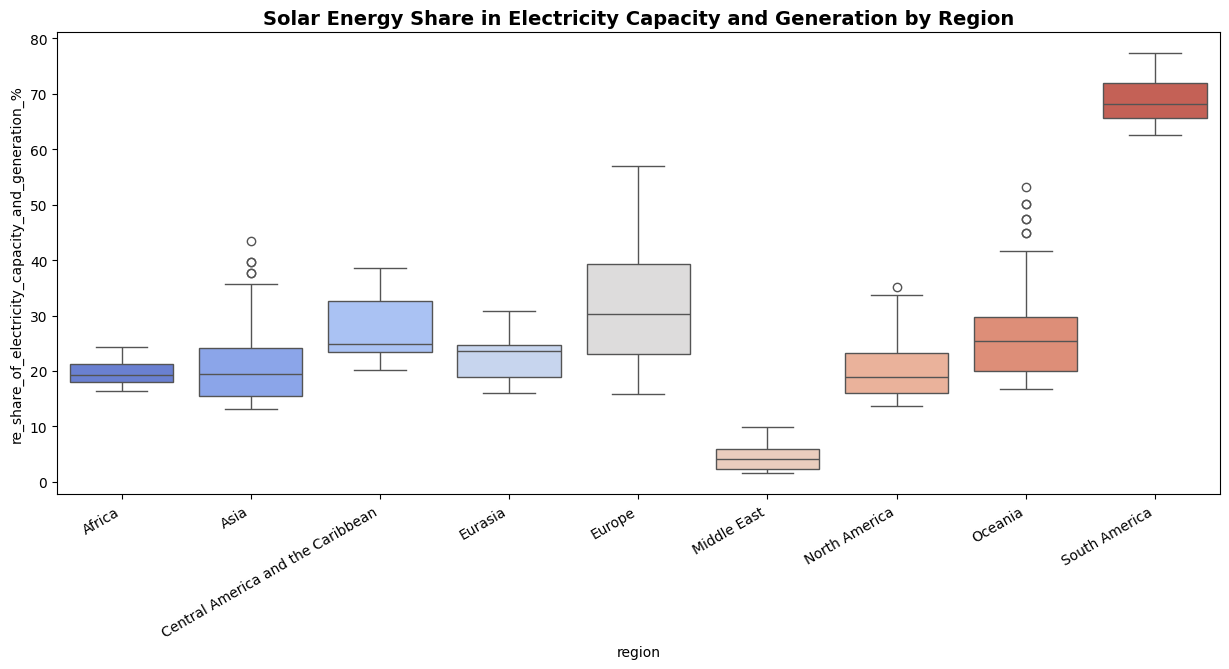

In [38]:
# Total renewable energy capacity and generation by region
plt.figure(figsize=(15, 6)) 
sns.boxplot(data=df_r_solar, x="region", y="re_share_of_electricity_capacity_and_generation_%", palette="coolwarm")

plt.title("Solar Energy Share in Electricity Capacity and Generation by Region", fontsize=14, fontweight='bold')
plt.yticks(rotation=0) 
plt.xticks(rotation=30, ha='right')
plt.show()

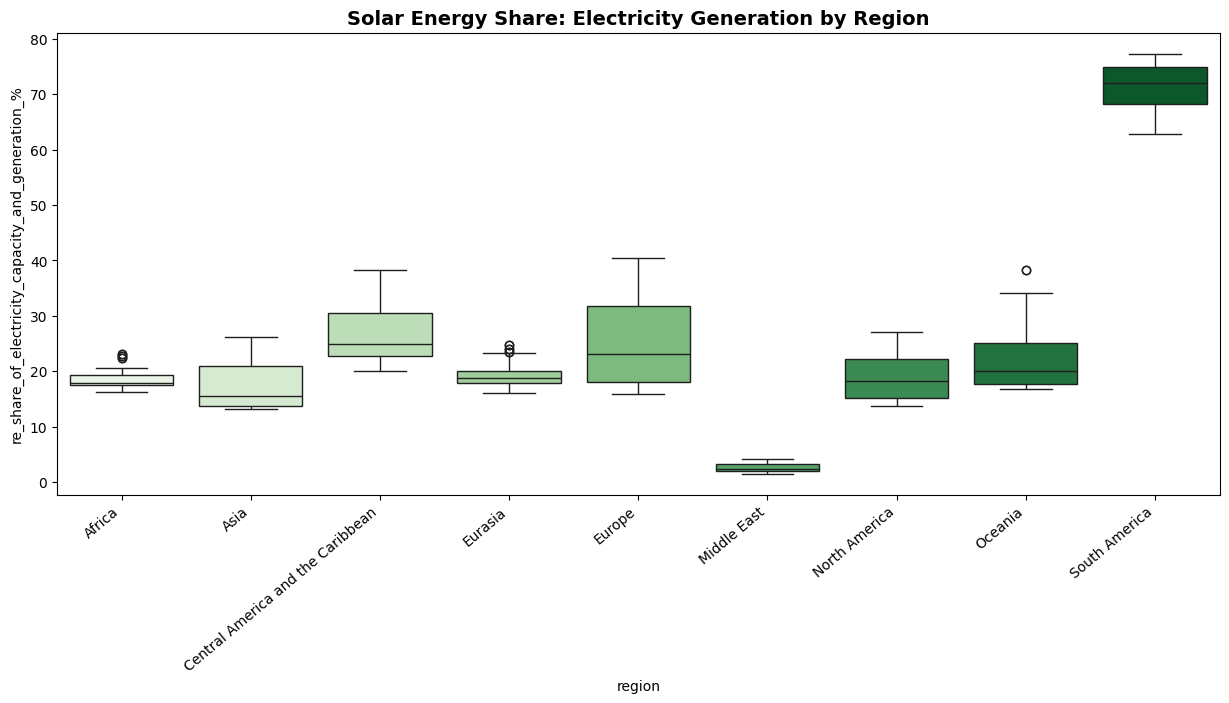

In [32]:
# electricity generation
plt.figure(figsize=(15, 6)) 
sns.boxplot(data=df_r_solar1, x="region", y="re_share_of_electricity_capacity_and_generation_%", hue='region', palette="Greens")

plt.title("Solar Energy Share: Electricity Generation by Region", fontsize=14, fontweight='bold')
plt.yticks(rotation=0) 
plt.xticks(rotation=40, ha='right')
plt.show()

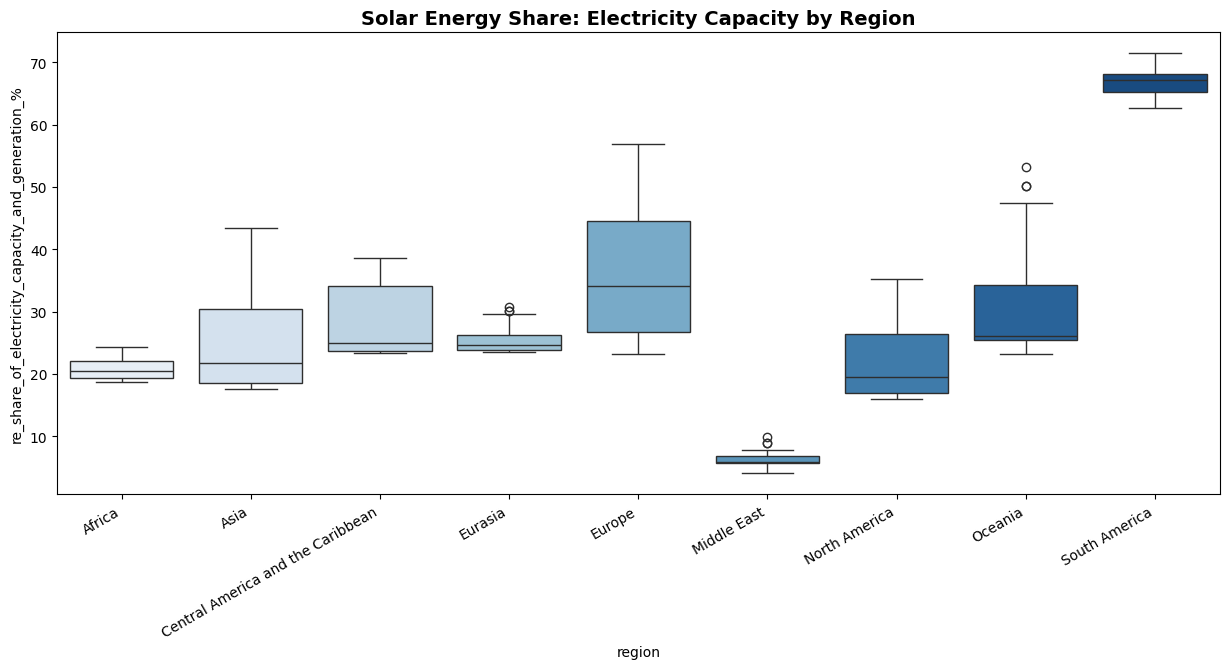

In [23]:
# electricity capacity
plt.figure(figsize=(15, 6)) 
sns.boxplot(data=df_r_solar2, x="region", y="re_share_of_electricity_capacity_and_generation_%", palette="Blues")

plt.title("Solar Energy Share: Electricity Capacity by Region", fontsize=14, fontweight='bold')
plt.yticks(rotation=0) 
plt.xticks(rotation=30, ha='right')
plt.show()

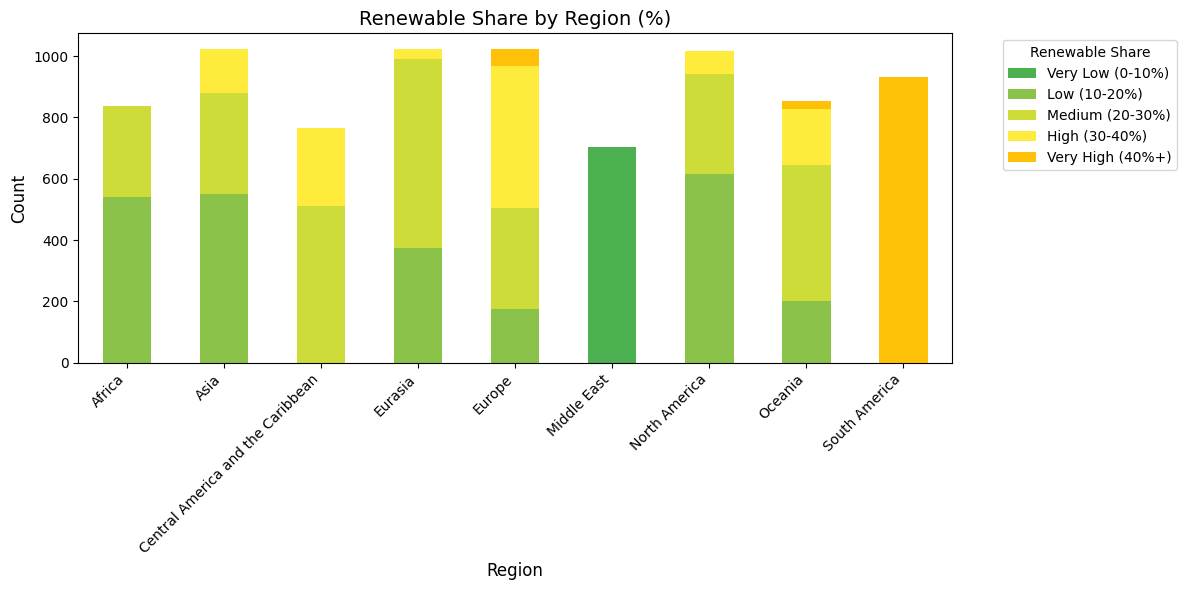

In [41]:
crosstab_result = pd.crosstab(df_r['region'], df_r['re_share_of_electricity_capacity_and_generation_%_rating'])

# Plot 
fig, ax = plt.subplots(figsize=(12, 6))  # size
crosstab_result.plot(kind='bar', stacked=True, ax=ax, 
                     color=['#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107'])

plt.legend(title='Renewable Share', bbox_to_anchor=(1.05, 1), loc='upper left') # legend placement

plt.xticks(rotation=45, ha='right') 
plt.title("Renewable Share by Region (%)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

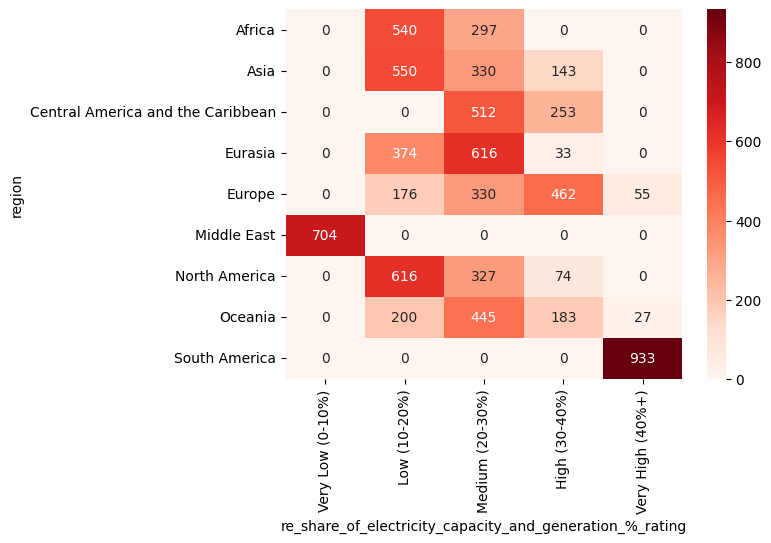

In [36]:
sns.heatmap(crosstab_result, annot=True, cmap="Reds", fmt="d")
plt.show()

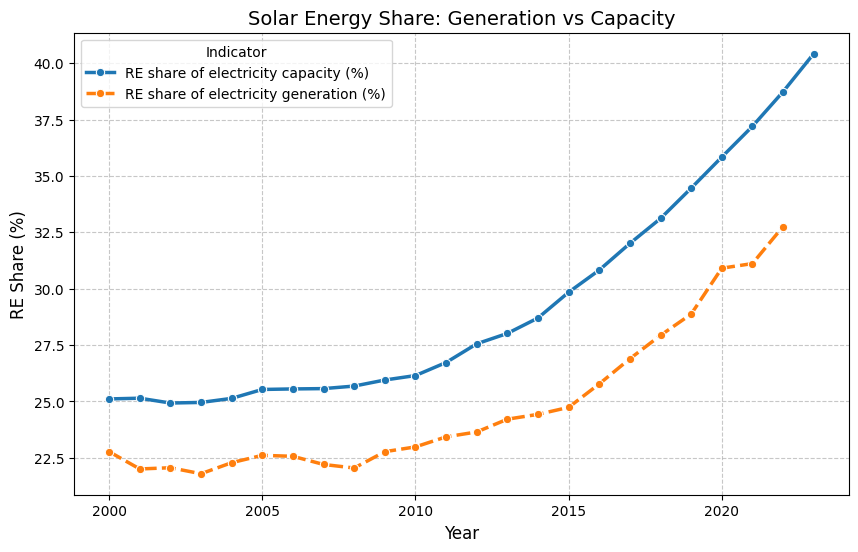

In [39]:
# prepare Vizz for Solar
df_r_filter = df_r_solar[['year', 'indicator', 're_share_of_electricity_capacity_and_generation_%']]
df_r_group = df_r_filter.groupby(['year', 'indicator'], as_index=False).mean()
df_pivot = df_r_group.pivot(index='year', columns='indicator', values='re_share_of_electricity_capacity_and_generation_%')

# plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_pivot, marker='o', linewidth=2.5)

plt.title('Solar Energy Share: Generation vs Capacity', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('RE Share (%)', fontsize=12)
plt.legend(title='Indicator')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<h3 style="color: #90c83e;">Chi Square</h3>

In [42]:
crosstab_result

re_share_of_electricity_capacity_and_generation_%_rating,Very Low (0-10%),Low (10-20%),Medium (20-30%),High (30-40%),Very High (40%+)
region,,,,,
Africa,0,540,297,0,0
Asia,0,550,330,143,0
Central America and the Caribbean,0,0,512,253,0
Eurasia,0,374,616,33,0
Europe,0,176,330,462,55
Middle East,704,0,0,0,0
North America,0,616,327,74,0
Oceania,0,200,445,183,27
South America,0,0,0,0,933


In [55]:
alpha = 0.05
# Chi-square test for 'RE share' and 'region'
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result)
print(f"Chi-square p-value: {chi2_pvalue:.180f}")

if chi2_pvalue < alpha:
    print("There is an association between the variables")
else:
    print("There is no assoociation between the variables")

Chi-square p-value: 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
There is an association between the variables


<h3 style="color: #90c83e;">Cramér's V</h3>

In [19]:
association(crosstab_result, method='cramer')

0.7441456552707307

**Insights**
- We can see in the heatmp and after testing it with the **Chi-Square**, that there is an association between the variables. We can see that Regions like South America have a higher share of renewable energy capacity and generation than other regions.
- The **Cramér's V** test shows a very high number (range = 0-1), representing a pretty strong association between the variables.


<h3 style="color: #90c83e;">ANOVA</h3>

- **Null Hypothesis (H0)**: the share of electricity capacity and generation does not depend on the region
- **Hypothesis (H1)**: the share of electricity capacity and generation depends on the region

In [ ]:
# define sub dataframes filtered by region & electricity_statistics
df_r_Asia1 = df_r[df_r['region'] == 'Asia']['electricity_statistics']
df_r_Eurasia1 = df_r[df_r['region'] == 'Eurasia']['electricity_statistics']
df_r_Europe1 = df_r[df_r['region'] == 'Europe']['electricity_statistics']
df_r_NA1 = df_r[df_r['region'] == 'North America']['electricity_statistics']
df_r_SA1 = df_r[df_r['region'] == 'South America']['electricity_statistics']
df_r_Oceania1 = df_r[df_r['region'] == 'Oceania']['electricity_statistics']
df_r_Africa1 = df_r[df_r['region'] == 'Africa']['electricity_statistics']
df_r_CAC1 = df_r[df_r['region'] == 'Central America and the Caribbean']['electricity_statistics']
df_r_ME1 = df_r[df_r['region'] == 'Middle East']['electricity_statistics']


# One-Way ANOVA Test
f_stat, p_value = st.f_oneway(df_r_Asia1, df_r_Eurasia1, df_r_Europe1, df_r_NA1, df_r_SA1, df_r_Oceania1, df_r_Africa1, df_r_CAC1, df_r_ME1)
print(f"F-Statistics : {f_stat:.2f}")
print(f"P-Value : {p_value:.180f}")
print()

alpha = 0.05

# Decision
if p_value < alpha:
    print("Reject the Null Hypothesis: Significant result.")
else:
    print("Fail to Reject the Null Hypothesis: Not a significant result.")

F-Statistics : 110.80
P-Value : 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000019972

Reject the Null Hypothesis: Significant result.


<h2 style="color: #4792d0;">country file</h2>
mainly tableau

In [52]:
# add categorical column 
df_c = categorize_column1(df_c, 'public_investments_(2021_million_usd)')

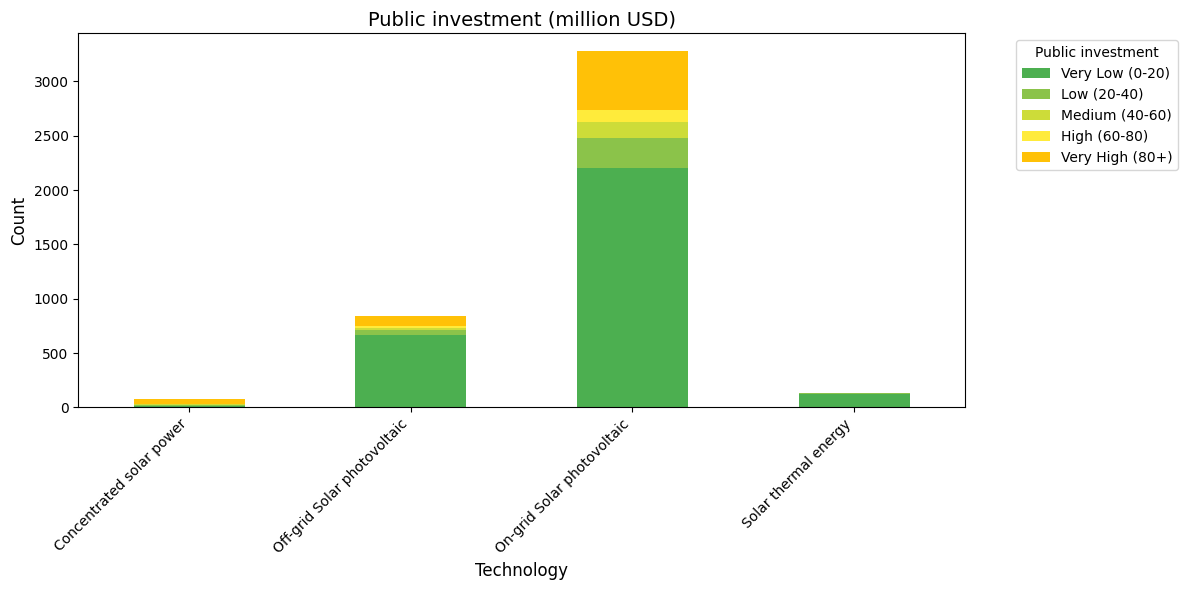

In [53]:
crosstab_result1 = pd.crosstab(df_c['technology'], df_c['public_investments_(2021_million_usd)_rating'])

# Plot 
fig, ax = plt.subplots(figsize=(12, 6))  # size
crosstab_result1.plot(kind='bar', stacked=True, ax=ax, 
                     color=['#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107'])

# legend placement
plt.legend(title='Public investment', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.xticks(rotation=45, ha='right') # Rotate x-axis
plt.title("Public investment (million USD)", fontsize=14)
plt.xlabel("Technology", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show plot with adjustments
plt.tight_layout()
plt.show()

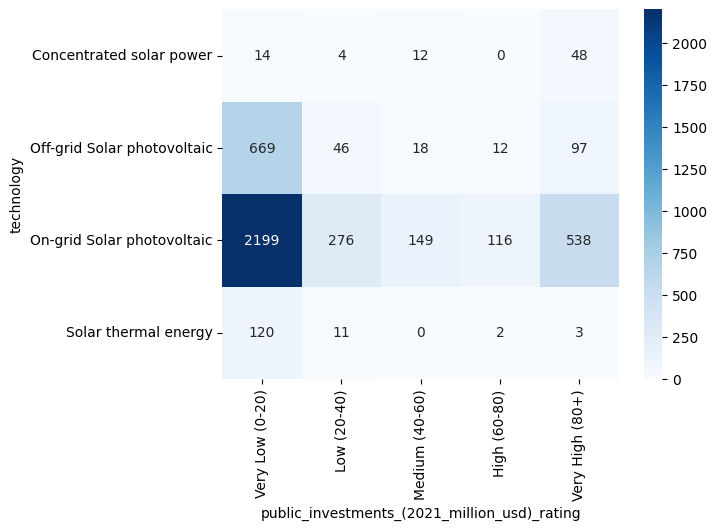

In [29]:
sns.heatmap(crosstab_result1, annot=True, cmap="Blues", fmt="d")
plt.show()


<h3 style="color: #4792d0;">Chi-Square</h3>

In [58]:
# technology & public investment 
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result1)
print(f"Chi-square p-value: {chi2_pvalue:.50f}")

if chi2_pvalue < alpha:
    print("There is an association between the variables")
else:
    print("There is no assoociation between the variables")

Chi-square p-value: 0.00000000000000000000000000000000000000000000675640
There is an association between the variables



<h3 style="color: #4792d0;">Cramér's V</h3>

In [27]:
association(crosstab_result1, method='cramer')

0.136391930113835

**Insights**
- We can see in the heatmp and after testing it with the **Chi-Square**, that there is an association between the variables. We can see that Regions like South America have a higher share of renewable energy capacity and generation than other regions.
- The **Cramér's V** test = 0.3163 (range = 0-1), representing not a very strong association between the variables.

<h3 style="color: #4792d0;">ANOVA</h3>

- **Null Hypothesis (H0)**: public investment does not depend on the continent
- **Hypothesis (H1)**: public investment depends on the continent

In [56]:
# define sub dataframes filtered by continent & public investment
df_c_Asia = df_c[df_c['continent'] == 'Asia']['public_investments_(2021_million_usd)']
df_c_Europe = df_c[df_c['continent'] == 'Europe']['public_investments_(2021_million_usd)']
df_c_NA = df_c[df_c['continent'] == 'North America']['public_investments_(2021_million_usd)']
df_c_SA = df_c[df_c['continent'] == 'South America']['public_investments_(2021_million_usd)']
df_c_Oceania = df_c[df_c['continent'] == 'Oceania']['public_investments_(2021_million_usd)']
df_c_Africa = df_c[df_c['continent'] == 'Africa']['public_investments_(2021_million_usd)']


# One-Way ANOVA Test
f_stat, p_value = st.f_oneway(df_c_Asia, df_c_Europe, df_c_NA, df_c_SA, df_c_Oceania, df_c_Africa)
print(f"F-Statistics : {f_stat:.2f}")
print(f"P-Value : {p_value:.40f}")
print()

alpha = 0.05

# Decision
if p_value < alpha:
    print("Reject the Null Hypothesis: Significant result.")
else:
    print("Fail to Reject the Null Hypothesis: Not a significant result.")

F-Statistics : 34.92
P-Value : 0.0000000000000000000000000000000000397584

Reject the Null Hypothesis: Significant result.
